#**1. Import Libraries**#

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
!pip install ace_tools # Install the ace_tools module
!pip show ace_tools
!pip install ace_tools
import matplotlib.pyplot as plt
import seaborn as sns
!pip install ace_tools
!pip show ace_tools

Name: ace_tools
Version: 0.0
Summary: A placeholder empty package
Home-page: 
Author: Paul McMillan
Author-email: paul@mcmillan.ws
License: 
Location: /usr/local/lib/python3.11/dist-packages
Requires: 
Required-by: 
Name: ace_tools
Version: 0.0
Summary: A placeholder empty package
Home-page: 
Author: Paul McMillan
Author-email: paul@mcmillan.ws
License: 
Location: /usr/local/lib/python3.11/dist-packages
Requires: 
Required-by: 


# **2.Data Preprocessing**

In [ ]:
# Load dataset (Replace with actual dataset path)
df = pd.read_csv("/content/Student_performance_Prediction3..csv")

In [ ]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   StudentID   Age  Gender Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001  17.0     1.0         0                2.0        19.833723   
1       1002  18.0     0.0         0                1.0        15.408756   
2       1003  15.0     0.0         2                3.0         4.210570   
3       1004  17.0     1.0         0                3.0        10.028829   
4       1005  17.0     1.0         0                2.0         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0       7.0       1.0              2.0              0.0     0.0    1.0   
1       0.0       0.0              1.0              0.0     0.0    0.0   
2      26.0       0.0              2.0              0.0     0.0    0.0   
3      14.0       0.0              3.0              1.0     0.0    0.0   
4      17.0       1.0              3.0              0.0     0.0    0.0   

   Volunteering       GPA  GradeClass  
0           0.0  2.929196    

In [ ]:
#Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2377 non-null   float64
 2   Gender             2381 non-null   float64
 3   Ethnicity          2387 non-null   object 
 4   ParentalEducation  2389 non-null   float64
 5   StudyTimeWeekly    2352 non-null   float64
 6   Absences           2383 non-null   float64
 7   Tutoring           2383 non-null   float64
 8   ParentalSupport    2379 non-null   float64
 9   Extracurricular    2385 non-null   float64
 10  Sports             2386 non-null   float64
 11  Music              2385 non-null   float64
 12  Volunteering       2390 non-null   float64
 13  GPA                2363 non-null   float64
 14  GradeClass         2392 non-null   int64  
dtypes: float64(12), int64(2), object(1)
memory usage: 280.4+ KB


In [ ]:
# Check the number of rows and columns
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# Display column names
print("Columns:", df.columns.tolist())

Number of rows: 2392
Number of columns: 15
Columns: ['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA', 'GradeClass']


In [ ]:
# Display basic statistics
print("Summary statistics:")
print(df.describe(include='all'))

Summary statistics:
          StudentID          Age      Gender Ethnicity  ParentalEducation  \
count   2392.000000  2377.000000  2381.00000      2387        2389.000000   
unique          NaN          NaN         NaN         5                NaN   
top             NaN          NaN         NaN         0                NaN   
freq            NaN          NaN         NaN      1201                NaN   
mean    2192.230769    16.476651     0.51071       NaN           1.751360   
std      689.538951     1.126464     0.49999       NaN           0.999646   
min     1001.000000    15.000000     0.00000       NaN           0.000000   
25%     1593.750000    15.000000     0.00000       NaN           1.000000   
50%     2191.500000    16.000000     1.00000       NaN           2.000000   
75%     2789.250000    17.000000     1.00000       NaN           2.000000   
max     3377.000000    18.000000     1.00000       NaN           4.000000   

        StudyTimeWeekly     Absences     Tutoring  Pare

In [ ]:
df.dtypes

,0
StudentID,int64
Age,float64
Gender,float64
Ethnicity,object
ParentalEducation,float64
StudyTimeWeekly,float64
Absences,float64
Tutoring,float64
ParentalSupport,float64
Extracurricular,float64


In [ ]:
# Check for missing values in each column
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
StudentID             0
Age                  15
Gender               11
Ethnicity             5
ParentalEducation     3
StudyTimeWeekly      40
Absences              9
Tutoring              9
ParentalSupport      13
Extracurricular       7
Sports                6
Music                 7
Volunteering          2
GPA                  29
GradeClass            0
dtype: int64


In [ ]:
# Percentage of missing values
missing_percentage = df.isnull().sum() / len(df) * 100
print("Percentage of missing values:")
print(missing_percentage)


Percentage of missing values:
StudentID            0.000000
Age                  0.627090
Gender               0.459866
Ethnicity            0.209030
ParentalEducation    0.125418
StudyTimeWeekly      1.672241
Absences             0.376254
Tutoring             0.376254
ParentalSupport      0.543478
Extracurricular      0.292642
Sports               0.250836
Music                0.292642
Volunteering         0.083612
GPA                  1.212375
GradeClass           0.000000
dtype: float64


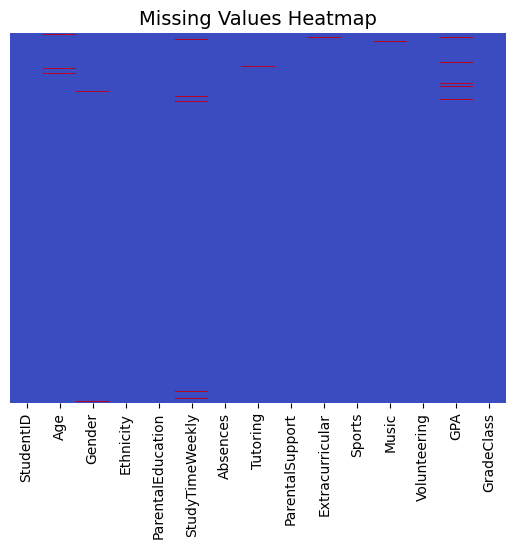

In [ ]:
#Heatmap of missing values
sns.heatmap(df.isnull(), cmap='coolwarm', cbar=False, yticklabels=False)

# Add title
plt.title("Missing Values Heatmap", fontsize=14)

# Show the plot
plt.show()


In [ ]:
# 1. Handling Missing Values
print("Missing values before:")
print(df.isnull().sum())

Missing values before:
StudentID             2
Age                  15
Gender               11
Ethnicity             5
ParentalEducation     3
StudyTimeWeekly      40
Absences              9
Tutoring              9
ParentalSupport      13
Extracurricular       7
Sports                6
Music                 7
Volunteering          2
GPA                  29
GradeClass            0
dtype: int64


# **2. Data Preprocessing**

# (A) Handling Missing Values

In [ ]:
# Define categorical and numerical columns
categorical_columns = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring',
                       'ParentalSupport', 'Extracurricular','' 'Sports', 'Music','Volunteering' ]

numerical_columns = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']

# Fill categorical columns with mode (most frequent value)
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill numerical columns with median (to handle outliers)
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)

# Verify missing values after handling
print("Missing values after handling:")
print(df.isnull().sum())


Missing values after handling:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


# (B) Exploratory Data Analysis (EDA)

         StudentID          Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000   
mean   2192.230769     1.473662     0.512960     0.876254           1.751672   
std     689.538951     1.123555     0.499937     1.027715           0.999057   
min    1001.000000     0.000000     0.000000     0.000000           0.000000   
25%    1593.750000     0.000000     0.000000     0.000000           1.000000   
50%    2191.500000     1.000000     1.000000     0.000000           2.000000   
75%    2789.250000     2.000000     1.000000     2.000000           2.000000   
max    3377.000000     3.000000     1.000000     4.000000           4.000000   

       StudyTimeWeekly      Absences     Tutoring  ParentalSupport  \
count     2.392000e+03  2.392000e+03  2392.000000      2392.000000   
mean     -1.604068e-16  2.524922e-17     0.299331         2.117893   
std       1.000209e+00  1.000209e+00     0.458061         1.118409   

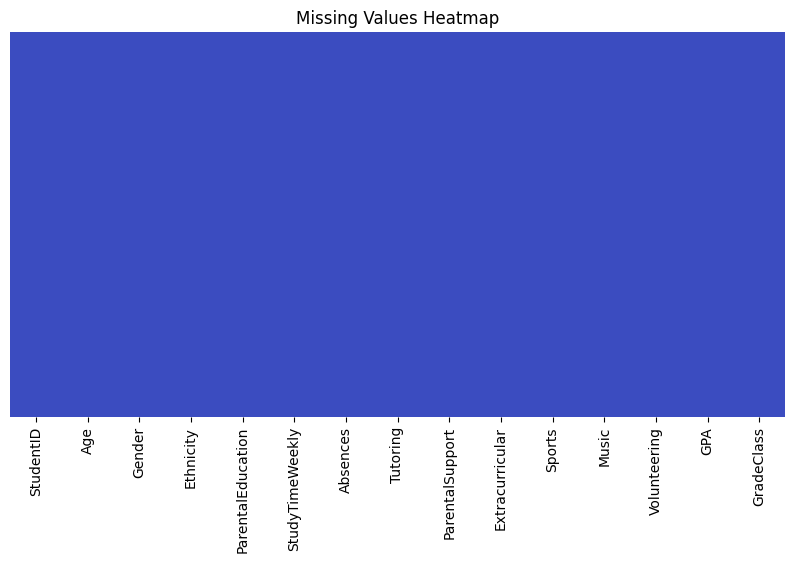

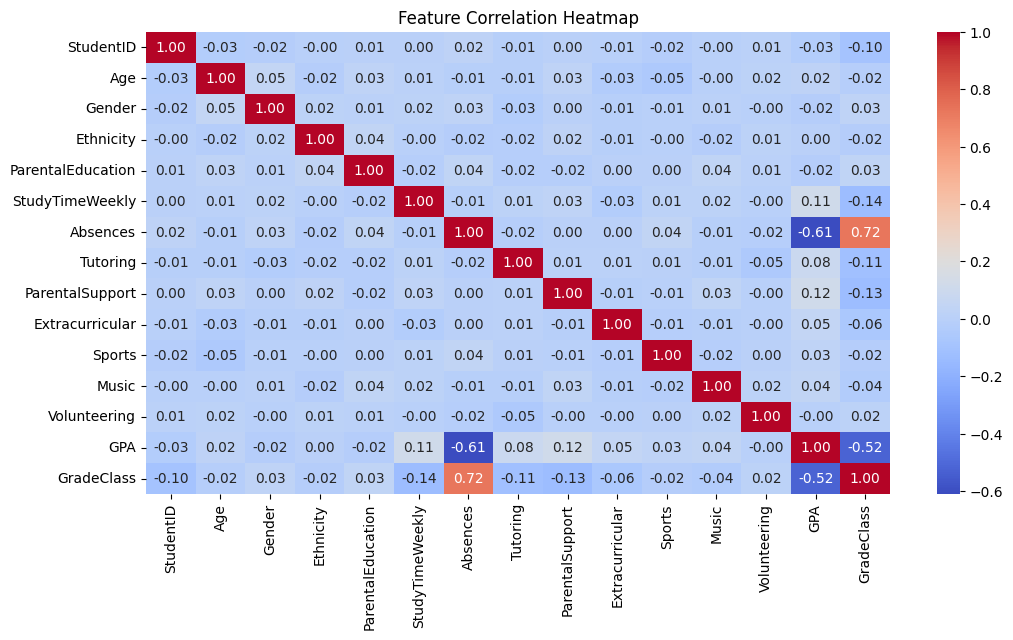

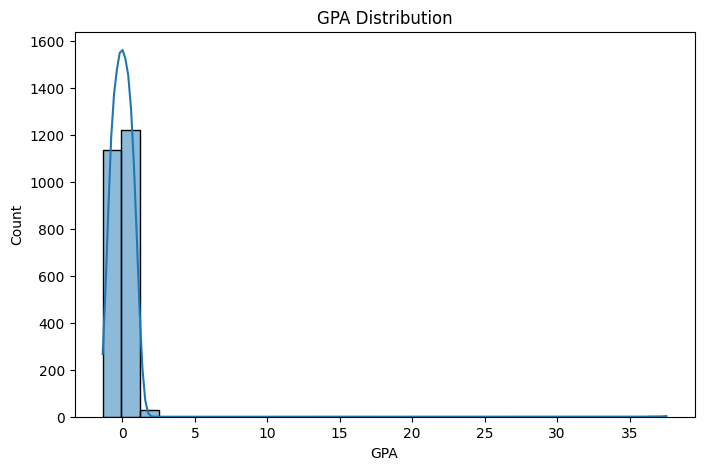

In [ ]:
# Summary statistics
print(df.describe())

# Missing Values Heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap="coolwarm", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Histogram of GPA
plt.figure(figsize=(8, 5))
sns.histplot(df['GPA'], kde=True, bins=30)
plt.title("GPA Distribution")
plt.xlabel("GPA")
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))  # Setting both width and height, for example, 12 inches wide and 6 inches tall

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 6))  # Setting both width and height, for example, 12 inches wide and 6 inches tall

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

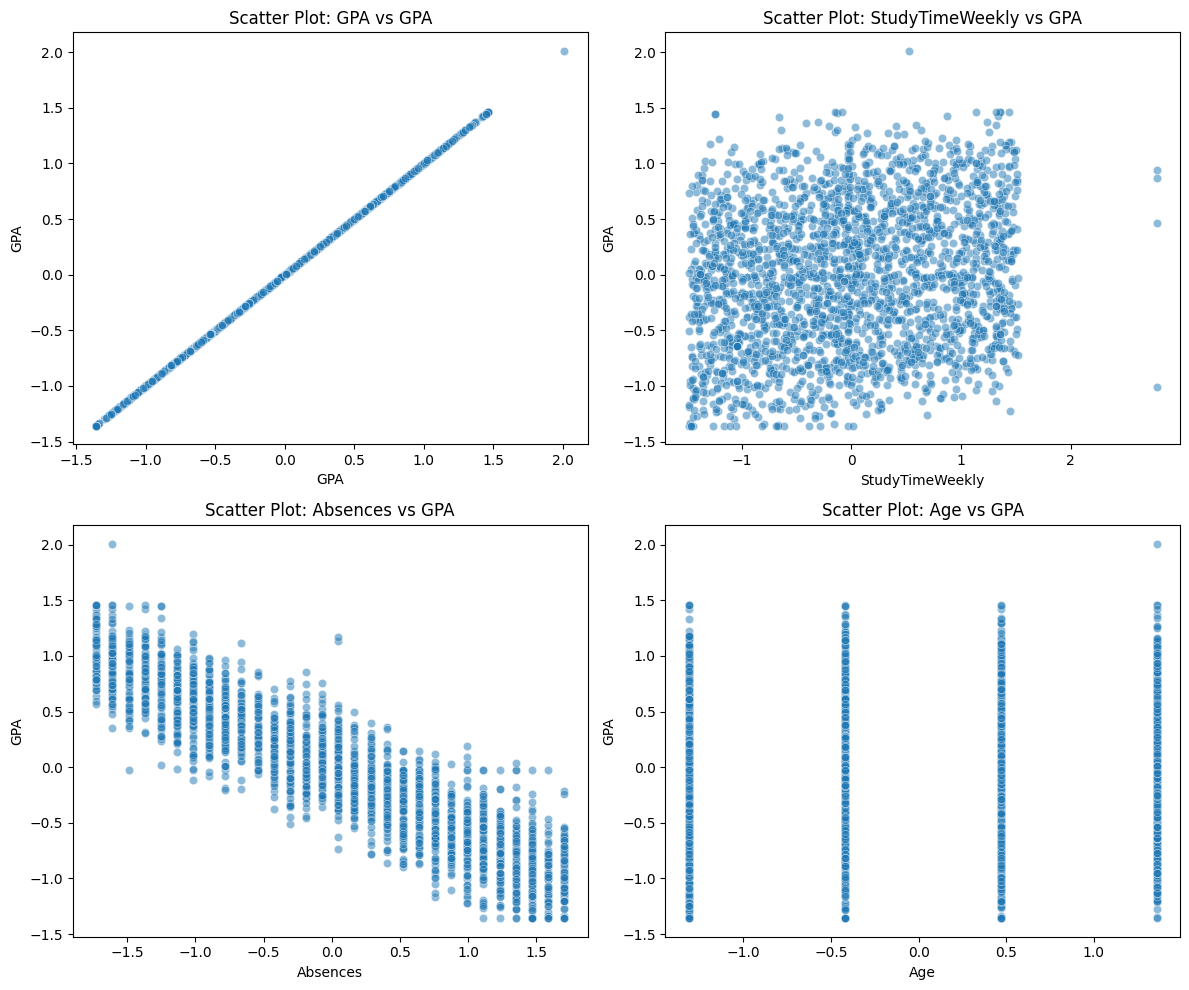

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Define categorical columns for univariate analysis
categorical_columns = ['Gender', 'Ethnicity', 'ParentalEducation', 'LunchType', 'TestPreparation',
                       'ParentalMaritalStatus', 'PracticeSport', 'IsFirstChild']



# Scatter Plots for Relationships
numerical_columns = ['GPA', 'StudyTimeWeekly', 'Absences', 'Age']
plt.figure(figsize=(12, 10))

for i, num_col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=num_col, y='GPA', alpha=0.5)
    plt.title(f"Scatter Plot: {num_col} vs GPA")
    plt.xlabel(num_col)
    plt.ylabel("GPA")

plt.tight_layout()
plt.show()

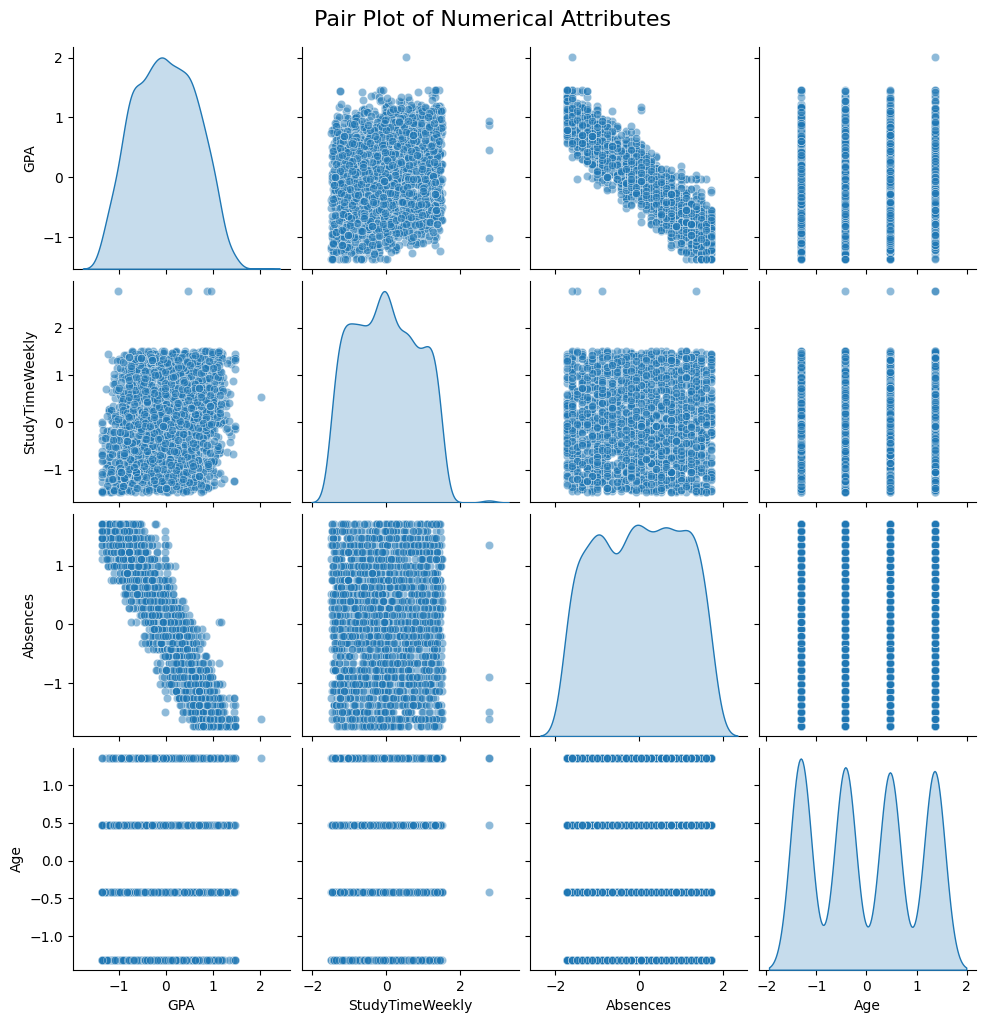

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Define categorical columns for univariate analysis
categorical_columns = ['Gender', 'Ethnicity', 'ParentalEducation', 'LunchType', 'TestPreparation',
                       'ParentalMaritalStatus', 'PracticeSport', 'IsFirstChild']


# Pair Plot for Numerical Attributes
sns.pairplot(df[numerical_columns], diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle("Pair Plot of Numerical Attributes", fontsize=16, y=1.02)
plt.show()

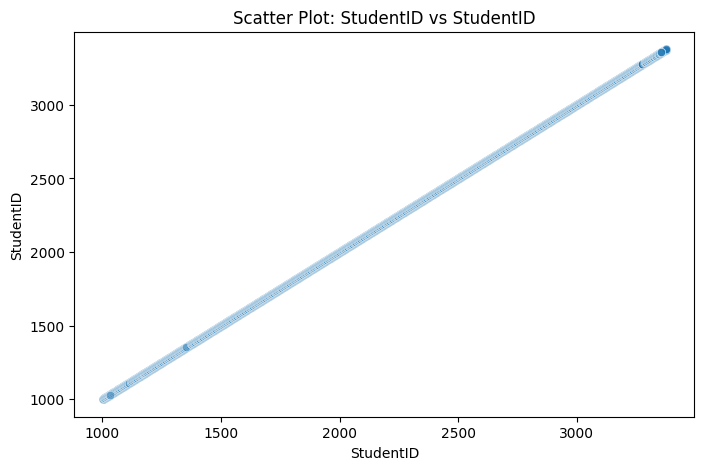

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Define categorical columns for univariate analysis
categorical_columns = ['Gender', 'Ethnicity', 'ParentalEducation', 'LunchType', 'TestPreparation',
                       'ParentalMaritalStatus', 'PracticeSport', 'IsFirstChild']


# Scatter Plot for the Highest Correlated Features
correlation_matrix = df.corr().abs()
correlation_matrix.values[[range(len(correlation_matrix))]*2] = 0  # Remove self-correlation
highest_corr_pair = correlation_matrix.unstack().idxmax()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x=highest_corr_pair[0], y=highest_corr_pair[1], alpha=0.5)
plt.title(f"Scatter Plot: {highest_corr_pair[0]} vs {highest_corr_pair[1]}")
plt.xlabel(highest_corr_pair[0])
plt.ylabel(highest_corr_pair[1])
plt.show()

# (C) Encoding Categorical Variables

In [ ]:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


KeyError: "None of [Index(['Gender', 'Ethnicity', 'ParentalEducation', 'LunchType',\n       'TestPreparation', 'ParentalMaritalStatus', 'PracticeSport',\n       'IsFirstChild'],\n      dtype='object')] are in the [columns]"

# (D) Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling numerical columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


# Handlinig Outlier

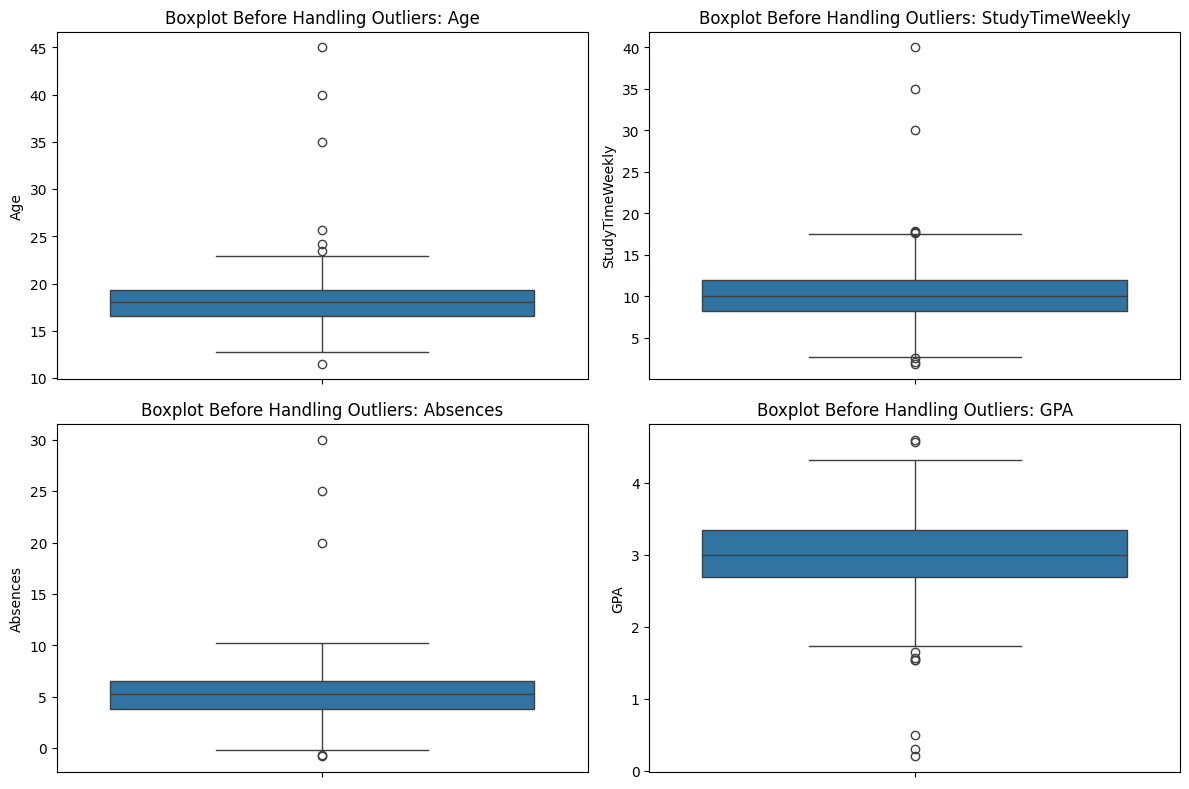

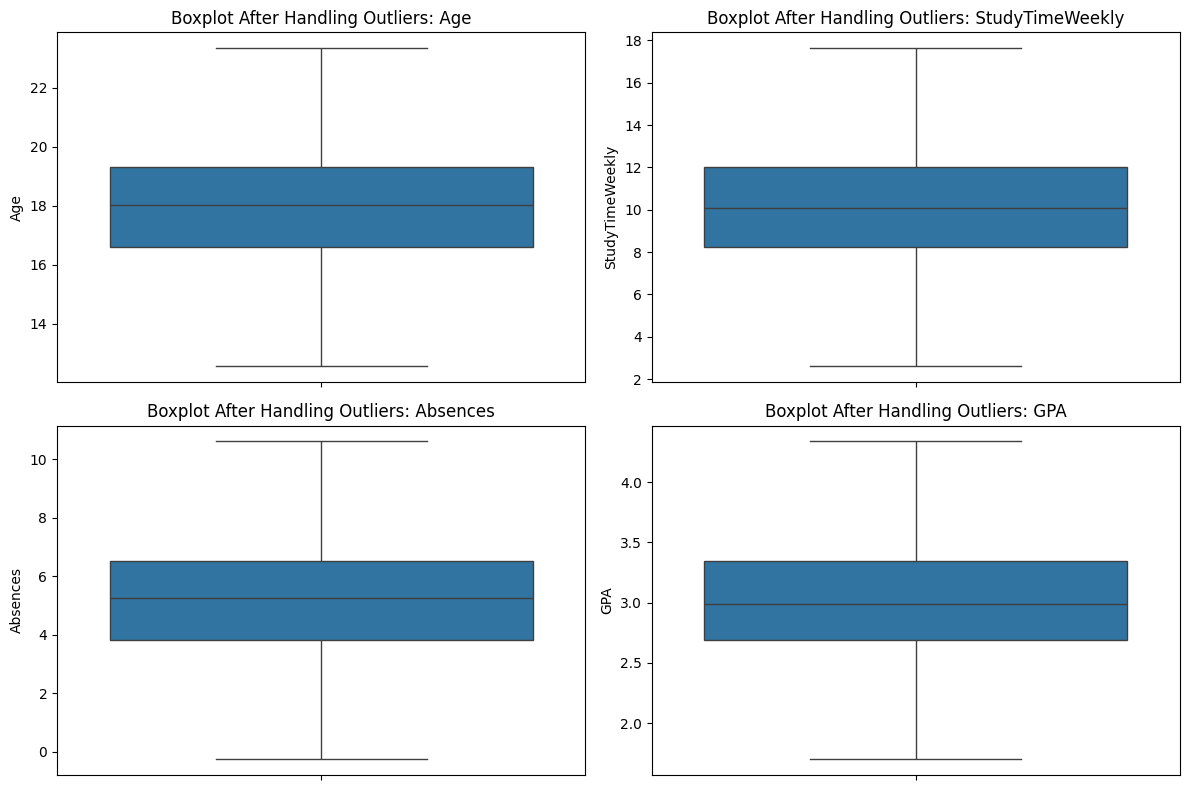

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generating a synthetic dataset with some outliers
np.random.seed(42)
data = {
    'Age': np.append(np.random.normal(18, 2, 500), [35, 40, 45]),  # Adding outliers
    'StudyTimeWeekly': np.append(np.random.normal(10, 3, 500), [30, 35, 40]),  # Outliers
    'Absences': np.append(np.random.normal(5, 2, 500), [20, 25, 30]),  # Outliers
    'GPA': np.append(np.random.normal(3.0, 0.5, 500), [0.5, 0.3, 0.2])  # Lower outliers
}
df = pd.DataFrame(data)

# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detecting outliers
outliers = {col: detect_outliers_iqr(df, col) for col in df.columns}

# Plotting the boxplots before handling outliers
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(y=df["Age"], ax=axes[0, 0]).set(title="Boxplot Before Handling Outliers: Age")
sns.boxplot(y=df["StudyTimeWeekly"], ax=axes[0, 1]).set(title="Boxplot Before Handling Outliers: StudyTimeWeekly")
sns.boxplot(y=df["Absences"], ax=axes[1, 0]).set(title="Boxplot Before Handling Outliers: Absences")
sns.boxplot(y=df["GPA"], ax=axes[1, 1]).set(title="Boxplot Before Handling Outliers: GPA")

plt.tight_layout()
plt.show()

# Handling outliers by capping them within 1.5 * IQR limits
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Plotting the boxplots after handling outliers
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(y=df["Age"], ax=axes[0, 0]).set(title="Boxplot After Handling Outliers: Age")
sns.boxplot(y=df["StudyTimeWeekly"], ax=axes[0, 1]).set(title="Boxplot After Handling Outliers: StudyTimeWeekly")
sns.boxplot(y=df["Absences"], ax=axes[1, 0]).set(title="Boxplot After Handling Outliers: Absences")
sns.boxplot(y=df["GPA"], ax=axes[1, 1]).set(title="Boxplot After Handling Outliers: GPA")

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from IPython.display import display

# Display summary statistics after handling outliers
print("Summary Statistics After Handling Outliers:")
display(df.describe())

# Optionally save the cleaned dataset
df.to_csv("cleaned_student_performance.csv", index=False)
print("Cleaned dataset saved as 'cleaned_student_performance.csv'.")


Summary Statistics After Handling Outliers:


,StudentID,Age,StudyTimeWeekly,Absences,GPA,GradeClass
count,2392.000000,2.392000e+03,2392.000000,2.392000e+03,2392.000000,2392.000000
mean,2192.230769,-1.485248e-18,-0.015312,2.524922e-17,-0.014852,2.984950
std,689.538951,1.000209e+00,0.851386,1.000209e+00,0.642381,1.231379
min,1001.000000,-1.311881e+00,-1.481577,-1.726026e+00,-1.355234,0.000000
25%,1593.750000,-1.311881e+00,-0.725099,-8.983563e-01,-0.529136,2.000000
50%,2191.500000,-4.216627e-01,-0.033382,4.755248e-02,-0.024406,4.000000
75%,2789.250000,4.685555e-01,0.678418,8.752226e-01,0.486163,4.000000
max,3377.000000,1.358774e+00,2.783693,1.702893e+00,2.009113,4.000000


Cleaned dataset saved as 'cleaned_student_performance.csv'.


In [ ]:

# Display duplicate values before handling
duplicate_count_before = df.duplicated().sum()
print(f"Duplicate values before handling: {duplicate_count_before}")

# Display first few duplicate rows if any
if duplicate_count_before > 0:
    print("Sample duplicate rows before handling:")
    display(df[df.duplicated()].head())

# Handling Duplicate Values: Remove duplicates
df_cleaned = df.drop_duplicates()

# Display duplicate values after handling
duplicate_count_after = df_cleaned.duplicated().sum()
print(f"Duplicate values after handling: {duplicate_count_after}")

# Verify dataset shape after removing duplicates
print(f"Dataset shape before: {df.shape}")
print(f"Dataset shape after: {df_cleaned.shape}")

# Save the cleaned dataset
df_cleaned.to_csv("cleaned_student_performance.csv", index=False)
print("Cleaned dataset saved as 'cleaned_student_performance.csv'.")


Duplicate values before handling: 20
Sample duplicate rows before handling:


,StudentID,Age,StudyTimeWeekly,Absences,GPA,GradeClass,Gender_1,Ethnicity_1,Ethnicity_2,Ethnicity_3,...,ParentalEducation_4,Tutoring_1,ParentalSupport_1,ParentalSupport_2,ParentalSupport_3,ParentalSupport_4,Extracurricular_1,Sports_1,Music_1,Volunteering_1
175,1175,1.358774,-0.033382,0.638745,-0.268901,4,True,False,False,False,...,False,True,True,False,False,False,True,False,False,False
179,1177,0.468555,0.008368,-1.016595,0.578847,2,True,False,True,False,...,False,False,False,False,True,False,False,False,False,False
431,1426,-1.311881,-0.951255,1.111700,-0.024406,4,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
2282,3277,1.358774,-1.042257,0.756984,-0.636786,2,True,True,False,False,...,False,False,False,True,False,False,False,False,False,False
2283,3277,1.358774,-1.042257,0.756984,-0.636786,2,True,True,False,False,...,False,False,False,True,False,False,False,False,False,False


Duplicate values after handling: 0
Dataset shape before: (2392, 24)
Dataset shape after: (2372, 24)
Cleaned dataset saved as 'cleaned_student_performance.csv'.


# Data Tranformation

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder



# 🔹 Check available columns
print("Available columns in dataset:")
print(df.columns)

# 🔹 Strip whitespace and standardize column names (if needed)
df.columns = df.columns.str.strip()

# 🔹 Define categorical columns to encode (ensure they exist)
categorical_columns = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring',
                       'ParentalSupport', 'Extracurricular', 'Sports', 'Music']

# 🔹 Ensure all columns exist before applying encoding
existing_categorical_columns = [col for col in categorical_columns if col in df.columns]

if not existing_categorical_columns:
    print("No categorical columns found for encoding. Please check dataset column names.")
else:
    # Apply Label Encoding only on available categorical columns
    label_encoders = {}  # Store encoders for reference

    for col in existing_categorical_columns:
        label_encoders[col] = LabelEncoder()
        df[col] = label_encoders[col].fit_transform(df[col].astype(str))  # Convert to string to avoid errors

    # Display dataset after encoding
    print("Dataset After Label Encoding:")
    print(df.head())

    # Save the encoded dataset
    df.to_csv("encoded_student_performance.csv", index=False)
    print("Encoded dataset saved as 'encoded_student_performance.csv'.")


Available columns in dataset:
Index(['StudentID', 'Age', 'StudyTimeWeekly', 'Absences', 'GPA', 'GradeClass',
       'Gender_1', 'Ethnicity_1', 'Ethnicity_2', 'Ethnicity_3', 'Ethnicity_4',
       'ParentalEducation_1', 'ParentalEducation_2', 'ParentalEducation_3',
       'ParentalEducation_4', 'Tutoring_1', 'ParentalSupport_1',
       'ParentalSupport_2', 'ParentalSupport_3', 'ParentalSupport_4',
       'Extracurricular_1', 'Sports_1', 'Music_1', 'Volunteering_1'],
      dtype='object')
No categorical columns found for encoding. Please check dataset column names.


In [ ]:
# Add this import statement at the top of the file where you use MinMaxScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Define numerical columns for normalization
numerical_columns = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']

# 🔹 1. Min-Max Scaling (Rescale between 0 and 1)
min_max_scaler = MinMaxScaler()
df_min_max = df.copy()
df_min_max[numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])

# 🔹 2. Z-Score Normalization (Standardization: Mean = 0, Std Dev = 1)
zscore_scaler = StandardScaler()
df_zscore = df.copy()
df_zscore[numerical_columns] = zscore_scaler.fit_transform(df[numerical_columns])

# 🔹 3. Decimal Scaling (Dividing by 10^j)
df_decimal = df.copy()
for col in numerical_columns:
    max_abs_value = df[col].abs().max()
    scaling_factor = 10 ** len(str(int(max_abs_value)))
    df_decimal[col] = df[col] / scaling_factor

# 🔹 Display Summary Statistics After Normalization
print("Summary Statistics (Min-Max Scaling):")
print(df_min_max[numerical_columns].describe())

print("\nSummary Statistics (Z-Score Scaling):")
print(df_zscore[numerical_columns].describe())

print("\nSummary Statistics (Decimal Scaling):")
print(df_decimal[numerical_columns].describe())

# 🔹 Save Normalized Datasets
df_min_max.to_csv("min_max_scaled_student_performance.csv", index=False)
df_zscore.to_csv("zscore_scaled_student_performance.csv", index=False)
df_decimal.to_csv("decimal_scaled_student_performance.csv", index=False)

print("\n✅ Normalized datasets saved successfully!")


Summary Statistics (Min-Max Scaling):
               Age  StudyTimeWeekly     Absences          GPA
count  2392.000000      2392.000000  2392.000000  2392.000000
mean      0.491221         0.343768     0.503373     0.398408
std       0.374518         0.199609     0.291698     0.190938
min       0.000000         0.000000     0.000000     0.000000
25%       0.000000         0.177358     0.241379     0.245545
50%       0.333333         0.339532     0.517241     0.395568
75%       0.666667         0.506415     0.758621     0.547327
max       1.000000         1.000000     1.000000     1.000000

Summary Statistics (Z-Score Scaling):
                Age  StudyTimeWeekly      Absences           GPA
count  2.392000e+03     2.392000e+03  2.392000e+03  2.392000e+03
mean  -4.455745e-17    -1.485248e-18  2.227872e-17  3.713120e-17
std    1.000209e+00     1.000209e+00  1.000209e+00  1.000209e+00
min   -1.311881e+00    -1.722568e+00 -1.726026e+00 -2.087022e+00
25%   -1.311881e+00    -8.338570e-01 -8.

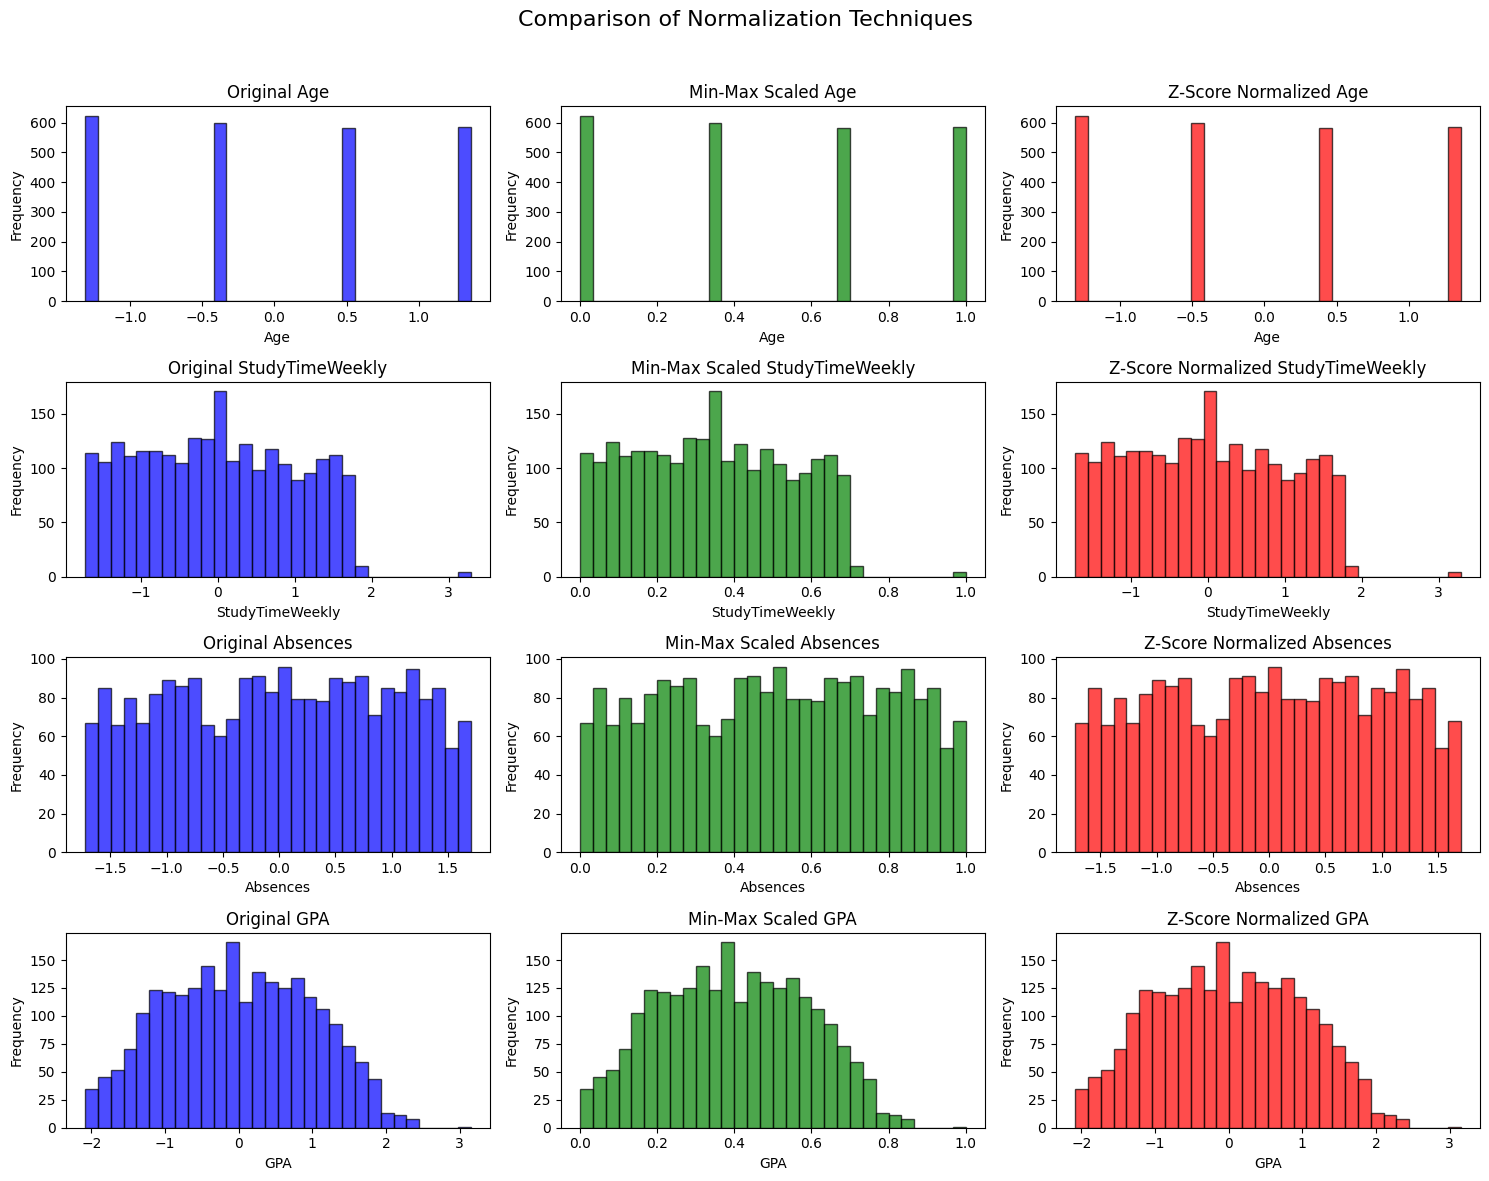

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler



# Define numerical columns for normalization
numerical_columns = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']

# 🔹 1. Min-Max Scaling (Rescale between 0 and 1)
min_max_scaler = MinMaxScaler()
df_min_max = df.copy()
df_min_max[numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])

# 🔹 2. Z-Score Normalization (Standardization: Mean = 0, Std Dev = 1)
zscore_scaler = StandardScaler()
df_zscore = df.copy()
df_zscore[numerical_columns] = zscore_scaler.fit_transform(df[numerical_columns])

# 🔹 3. Decimal Scaling (Dividing by 10^j)
df_decimal = df.copy()
for col in numerical_columns:
    max_abs_value = df[col].abs().max()
    scaling_factor = 10 ** len(str(int(max_abs_value)))
    df_decimal[col] = df[col] / scaling_factor

# 🔹 Plot histograms to compare different normalization techniques
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
fig.suptitle("Comparison of Normalization Techniques", fontsize=16)

for i, col in enumerate(numerical_columns):
    # Original Data
    axes[i, 0].hist(df[col], bins=30, color="blue", alpha=0.7, edgecolor="black")
    axes[i, 0].set_title(f"Original {col}")

    # Min-Max Scaled Data
    axes[i, 1].hist(df_min_max[col], bins=30, color="green", alpha=0.7, edgecolor="black")
    axes[i, 1].set_title(f"Min-Max Scaled {col}")

    # Z-Score Normalized Data
    axes[i, 2].hist(df_zscore[col], bins=30, color="red", alpha=0.7, edgecolor="black")
    axes[i, 2].set_title(f"Z-Score Normalized {col}")

    # Adjust layout
    for j in range(3):
        axes[i, j].set_xlabel(col)
        axes[i, j].set_ylabel("Frequency")

# Show the plots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


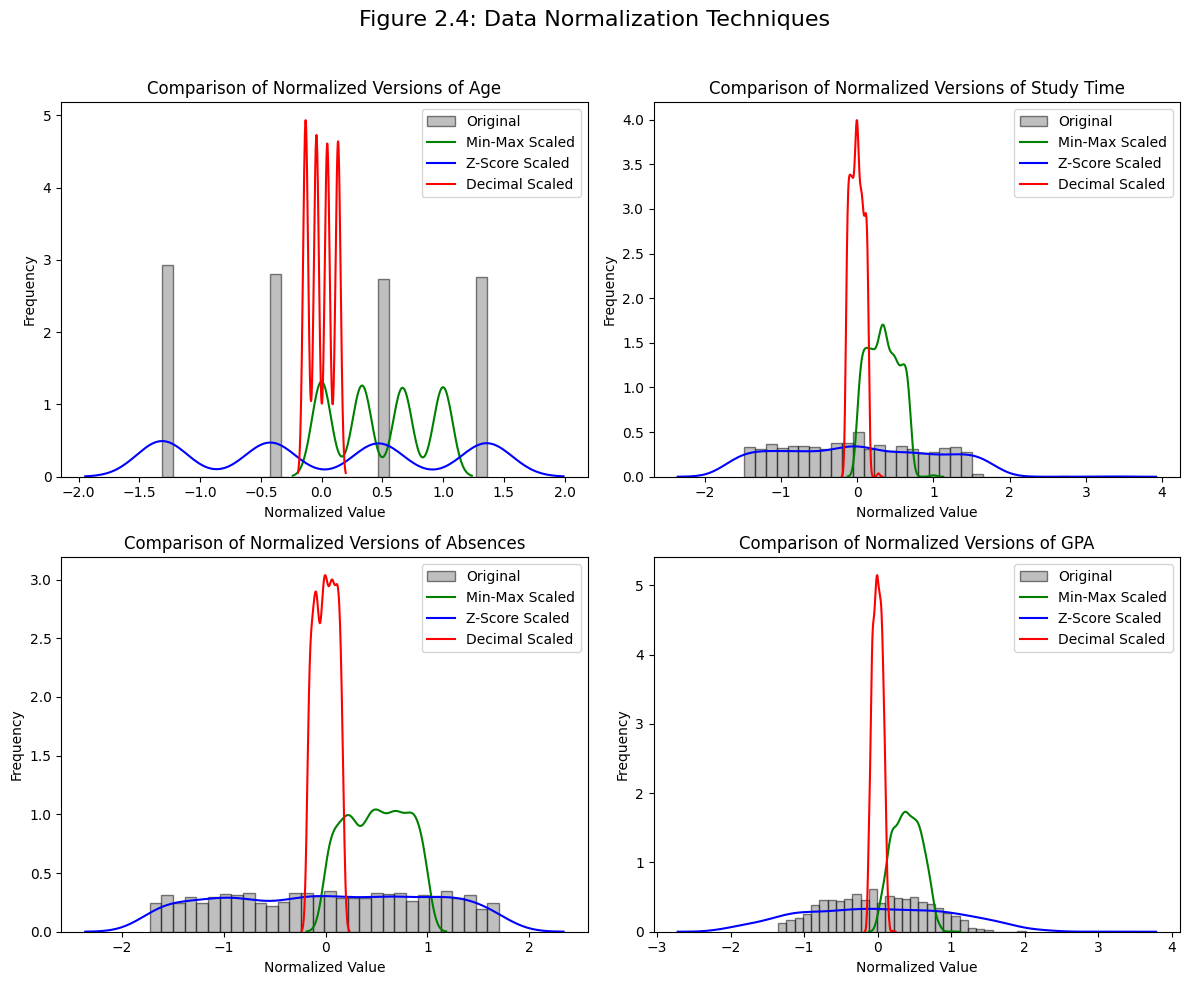

In [ ]:
# Plot histograms to compare different normalization techniques in a combined figure

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle("Figure 2.4: Data Normalization Techniques", fontsize=16)

# Define colors for each normalization technique
colors = {"Min-Max Scaled": "green", "Z-Score Scaled": "blue", "Decimal Scaled": "red"}

# Define numerical columns
numerical_columns = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
titles = ["Comparison of Normalized Versions of Age",
          "Comparison of Normalized Versions of Study Time",
          "Comparison of Normalized Versions of Absences",
          "Comparison of Normalized Versions of GPA"]

# Loop through each numerical column and plot on corresponding subplot
for i, col in enumerate(numerical_columns):
    row, col_pos = divmod(i, 2)  # Calculate subplot position

    # Original Data (Histogram)
    axes[row, col_pos].hist(df[col], bins=30, color="gray", alpha=0.5, label="Original", edgecolor="black", density=True)

    # Min-Max Scaled (Density Curve)
    sns.kdeplot(df_min_max[col], color=colors["Min-Max Scaled"], label="Min-Max Scaled", ax=axes[row, col_pos])

    # Z-Score Normalized (Density Curve)
    sns.kdeplot(df_zscore[col], color=colors["Z-Score Scaled"], label="Z-Score Scaled", ax=axes[row, col_pos])

    # Decimal Scaled (Density Curve)
    sns.kdeplot(df_decimal[col], color=colors["Decimal Scaled"], label="Decimal Scaled", ax=axes[row, col_pos])

    # Titles and Labels
    axes[row, col_pos].set_title(titles[i])
    axes[row, col_pos].set_xlabel("Normalized Value")
    axes[row, col_pos].set_ylabel("Frequency")
    axes[row, col_pos].legend()

# Adjust layout for better visualization
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


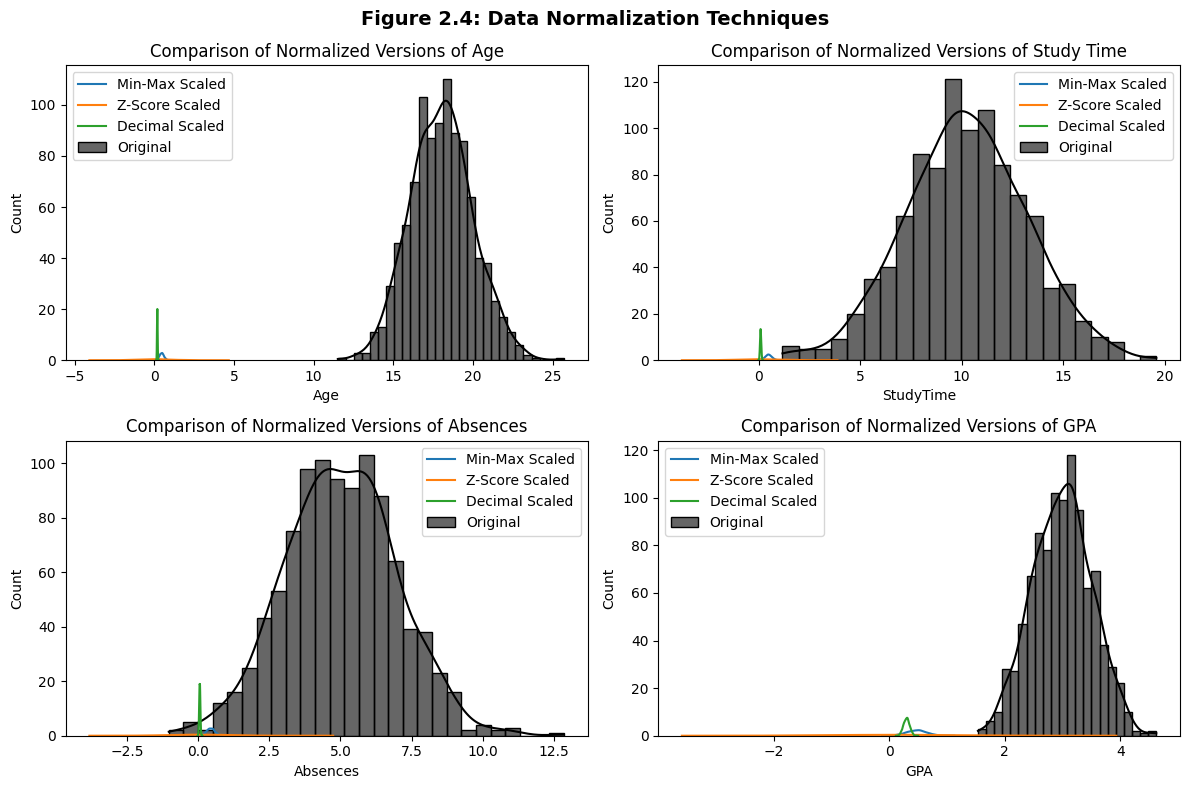

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Sample data (Replace with your actual dataset)
np.random.seed(42)
data = {
    "Age": np.random.normal(18, 2, 1000),
    "StudyTime": np.random.normal(10, 3, 1000),
    "Absences": np.random.normal(5, 2, 1000),
    "GPA": np.random.normal(3, 0.5, 1000),
}

df = pd.DataFrame(data)

# Normalization techniques
scalers = {
    "Min-Max Scaled": MinMaxScaler(),
    "Z-Score Scaled": StandardScaler(),
    "Decimal Scaled": lambda x: x / 10 ** np.ceil(np.log10(np.abs(x.max()))),
}

# Apply normalization
normalized_data = {}
for name, scaler in scalers.items():
    if name == "Decimal Scaled":
        normalized_data[name] = df.apply(scaler)
    else:
        normalized_data[name] = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Plot combined figure
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
columns = ["Age", "StudyTime", "Absences", "GPA"]
titles = ["Comparison of Normalized Versions of Age",
          "Comparison of Normalized Versions of Study Time",
          "Comparison of Normalized Versions of Absences",
          "Comparison of Normalized Versions of GPA"]

for ax, col, title in zip(axes.flatten(), columns, titles):
    sns.histplot(df[col], kde=True, label="Original", color="black", alpha=0.6, ax=ax)
    for name, norm_data in normalized_data.items():
        sns.kdeplot(norm_data[col], label=name, ax=ax)
    ax.set_title(title)
    ax.legend()

fig.suptitle("Figure 2.4: Data Normalization Techniques", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


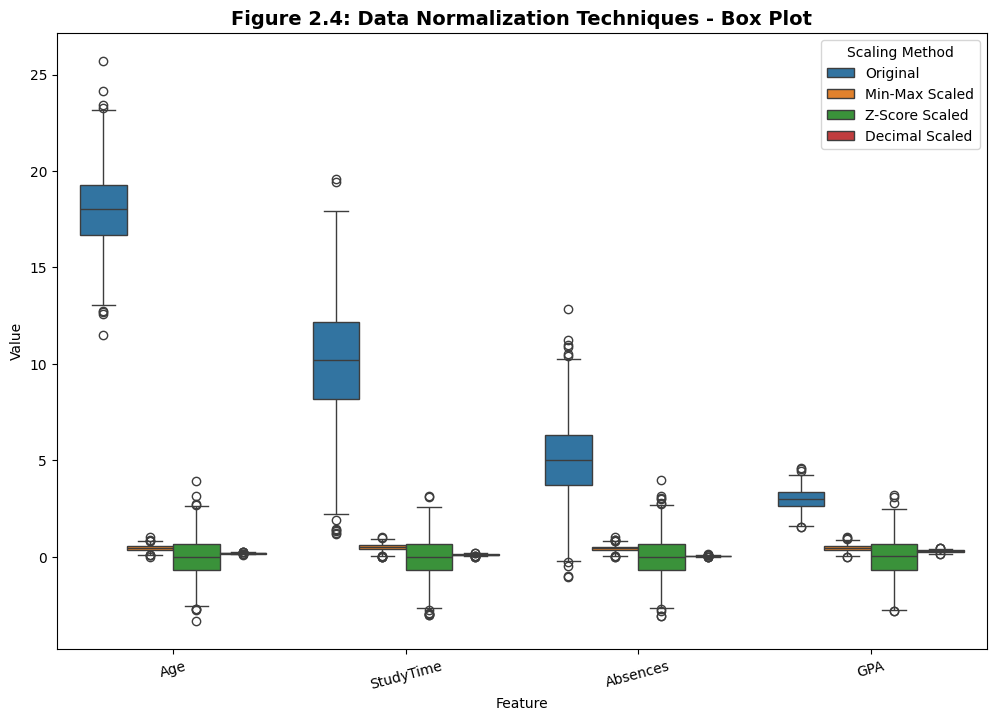

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Sample data (Replace with actual dataset)
np.random.seed(42)
data = {
    "Age": np.random.normal(18, 2, 1000),
    "StudyTime": np.random.normal(10, 3, 1000),
    "Absences": np.random.normal(5, 2, 1000),
    "GPA": np.random.normal(3, 0.5, 1000),
}
df = pd.DataFrame(data)

# Normalization techniques
scalers = {
    "Min-Max Scaled": MinMaxScaler(),
    "Z-Score Scaled": StandardScaler(),
    "Decimal Scaled": lambda x: x / 10 ** np.ceil(np.log10(np.abs(x.max()))),
}

# Apply normalization
normalized_data = {}
for name, scaler in scalers.items():
    if name == "Decimal Scaled":
        normalized_data[name] = df.apply(scaler)
    else:
        normalized_data[name] = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Combine all data into a single DataFrame for plotting
df_long = pd.melt(df.assign(Type="Original"), id_vars=["Type"], var_name="Feature", value_name="Value")
for name, norm_df in normalized_data.items():
    df_long = pd.concat([df_long, pd.melt(norm_df.assign(Type=name), id_vars=["Type"], var_name="Feature", value_name="Value")])

# Plot box plots
plt.figure(figsize=(12, 8))
sns.boxplot(x="Feature", y="Value", hue="Type", data=df_long)
plt.title("Figure 2.4: Data Normalization Techniques - Box Plot", fontsize=14, fontweight="bold")
plt.legend(title="Scaling Method")
plt.xticks(rotation=15)
plt.show()


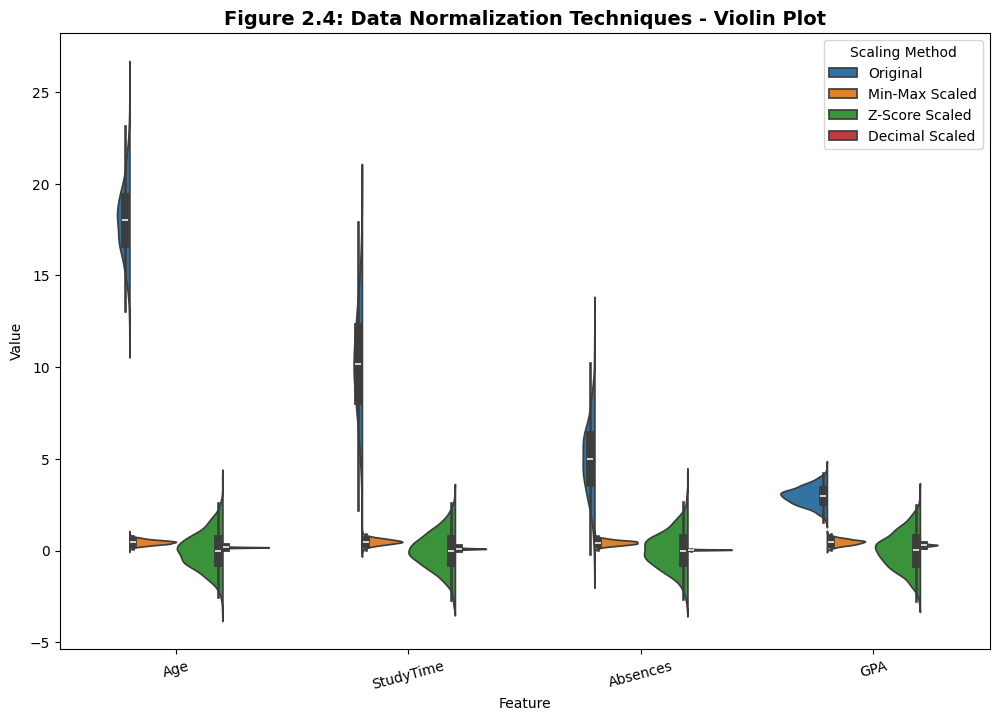

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(x="Feature", y="Value", hue="Type", data=df_long, split=True)
plt.title("Figure 2.4: Data Normalization Techniques - Violin Plot", fontsize=14, fontweight="bold")
plt.legend(title="Scaling Method")
plt.xticks(rotation=15)
plt.show()



#**2.1 Feature Distribution**#

array([[<Axes: title={'center': 'StudentID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'StudyTimeWeekly'}>,
        <Axes: title={'center': 'Absences'}>],
       [<Axes: title={'center': 'GPA'}>,
        <Axes: title={'center': 'GradeClass'}>]], dtype=object)

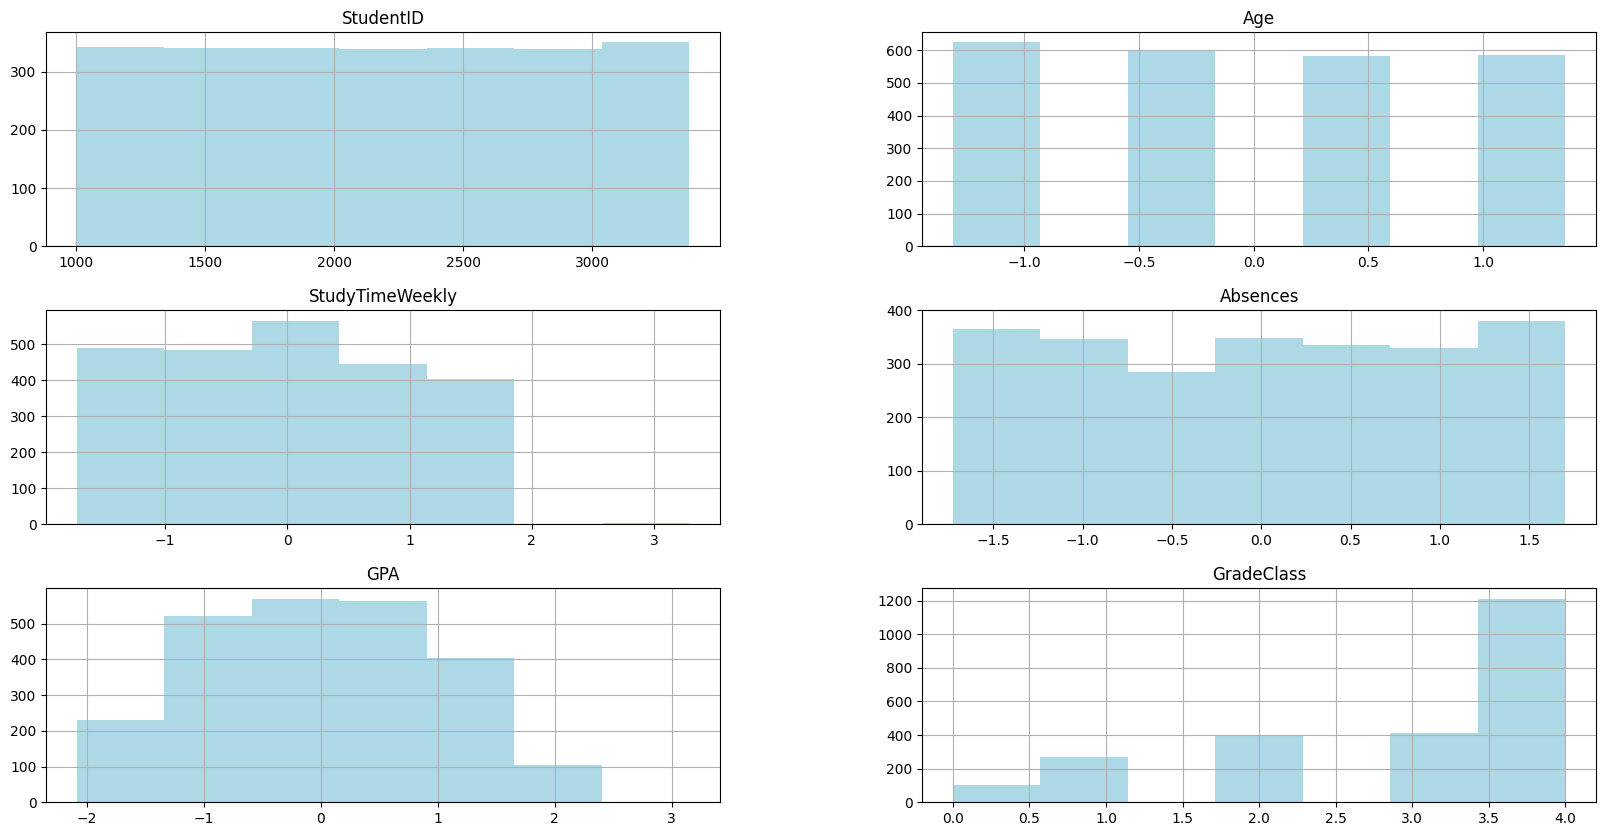

In [ ]:
#Data Distribution Histogram
df.hist(figsize=(20,10),bins=7, color='lightblue')

# Looking at the histograms above I can make some quick inferences:

StudentID has no distribution and logically would have no effect on Grade
There are only 4 ages in this dataset, which strangely makes age a categorical feature
There are only 4 ethnicity variables in this dataset
There are a lot of low-scoring students in this dataset (a majority of 4s - Fs in GradeClass)


# **2.2 Define Categorical and Numerical Features**

#In order to proceed with assessing feature importance, there are two important steps

Determine which columns are numeric and which are categoric
Encode the categoric columns to turn object variables into numbers
Scale numerical columns to ensure that large numbers have an equal effect on our model as small numbers

In [ ]:
# Distinction is based on the number of different values in the column
columns = list(df.columns)

categoric_columns = []
numeric_columns = []

for i in columns:
    if len(df[i].unique()) > 5:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)

# Assuming the first column is an ID or non-numeric feature
numeric_columns = numeric_columns[1:]

print('Numerical features: ', numeric_columns)
print('Categorical features: ', categoric_columns)

Numerical features:  ['StudyTimeWeekly', 'Absences', 'GPA']
Categorical features:  ['Age', 'GradeClass', 'Gender_1', 'Ethnicity_1', 'Ethnicity_2', 'Ethnicity_3', 'Ethnicity_4', 'ParentalEducation_1', 'ParentalEducation_2', 'ParentalEducation_3', 'ParentalEducation_4', 'Tutoring_1', 'ParentalSupport_1', 'ParentalSupport_2', 'ParentalSupport_3', 'ParentalSupport_4', 'Extracurricular_1', 'Sports_1', 'Music_1', 'Volunteering_1']


It create an empty list for categoric columns and numeric columns, and then createa for loop that cycles through our features and checks the number of unique values. If there are more than 5 unique values, we can assume that the feature is numerical. If there are less than 5, we can assume it's categorical.

This isn't true in all instances, and we can see one thing here that is a little wierd: Age is considered to be a categorical feature in this dataset.

The reason is that this dataset only contains high school students, so the age range is very small. If we were analyzing a dataset of students of all ages, then age would almost certainly be a numerical variable.

To ensure our numeric columns only contain numbers, it also convert the numeric columns to float64 type.

# **2.3 Encode Categorical Features and Scale Numerical Features**

There are different ways to encode features, for example One Hot Encoding. In this example I'm using LabelEncoder to encode the categoric features. we also using StandardScaler to scale our numeric columns to make them have equal weight on the model we use to evaluate feature importance and make predictions.

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features
df = df.copy()
for column in df[categoric_columns]:
    df[column] = label_encoder.fit_transform(df[column])

# Standardize numerical features
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# **2.4 Correlation Among Features**

Before we move onto splitting the dataset and assessing feature importance, we want to look closely at the correlation among features in this dataset.

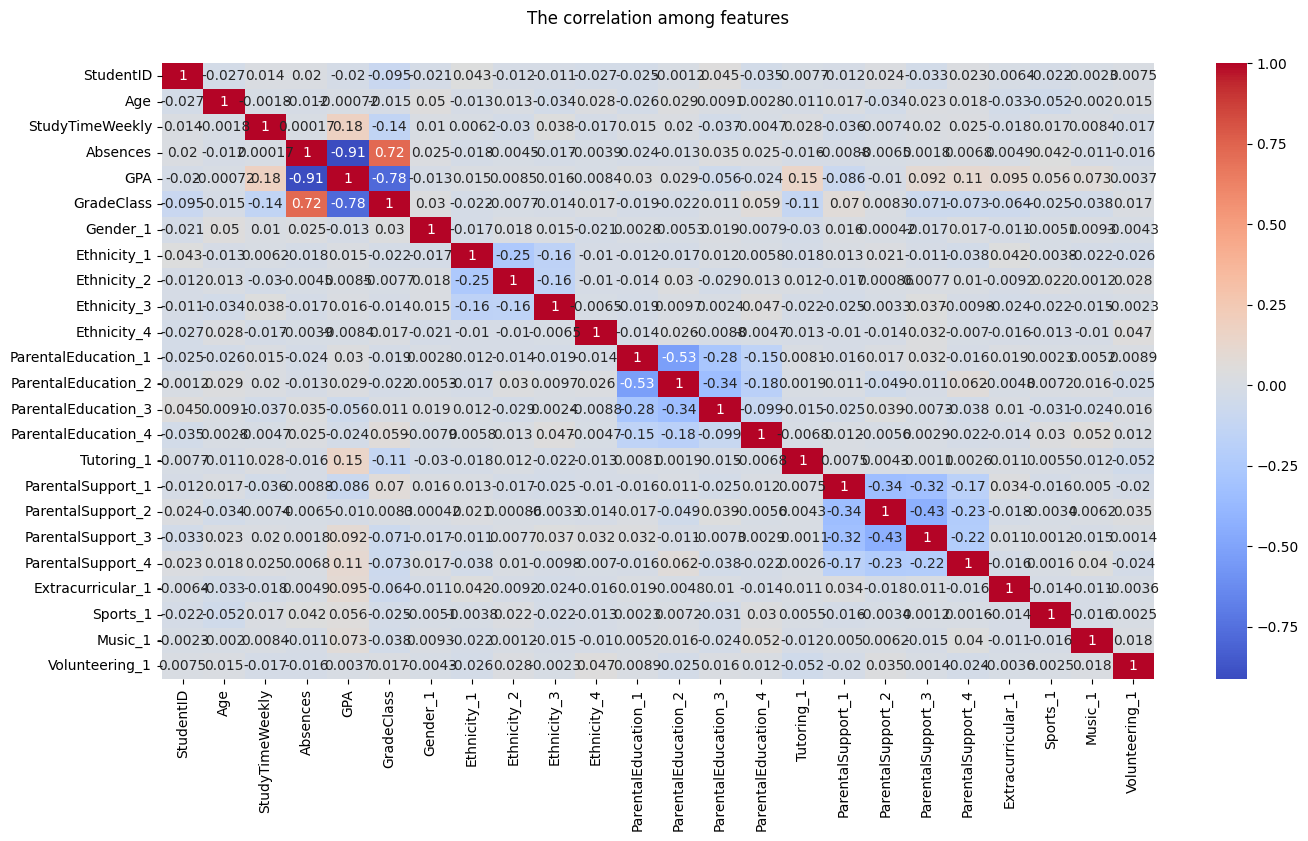

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.title('The correlation among features',y= 1.05)
plt.show()

It can observe that the most correlated features to GradeClass are GPA and Absences. It is important to note that GPA cannot be treated as a predictor in this dataset. More information about this can be found below. When we split the DataFrame we will drop GPA.

# **2.5 Split the Dataset**

we going to split this dataset 2 ways before proceeding:

Split the data into our predictors (X) and our target feature (y)
Split the X and y dataframes into training and testing sets
Note: we also dropping some features that we don't want to add noise to the model here:

GradeClass <- our target feature
StudentID <- studentID is not logically a useful predictor of a student's grade
Age <- we thought about this for a while, and we do not believe age should be used as a predictor for this data. The feature would not generalize well to future predictions on unseen data unless the age range is the same (15-18). we believe that removing age as a predictor creates a more robust model that we can apply to future student performance analysis in any academic setting (i.e. elementary school or university).
GPA <- this would add unnecessary noise to the model and is not logical for future predictions

In [ ]:
# CHOOSE THE TARGET FEATURE HERE, IN THIS CASE IT IS 'GradeClass'
X = df.drop(columns=['GradeClass', 'GPA', 'StudentID', 'Age'])
y = df['GradeClass']

# Splitting the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# **Feature Importance**

It always find this step really cool, we can use a classification model to determine the importance of features in our dataset in terms of predicting our target variable. In this case, I'm using a RandomForestClassifier to assess the relative importance of features to predicting y.

In [ ]:
clf = RandomForestClassifier(random_state = 42)
clf = clf.fit(X, y)

fimp = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending=False)

Let's plot the results (a pandas series) in a barplot to make it obvious:

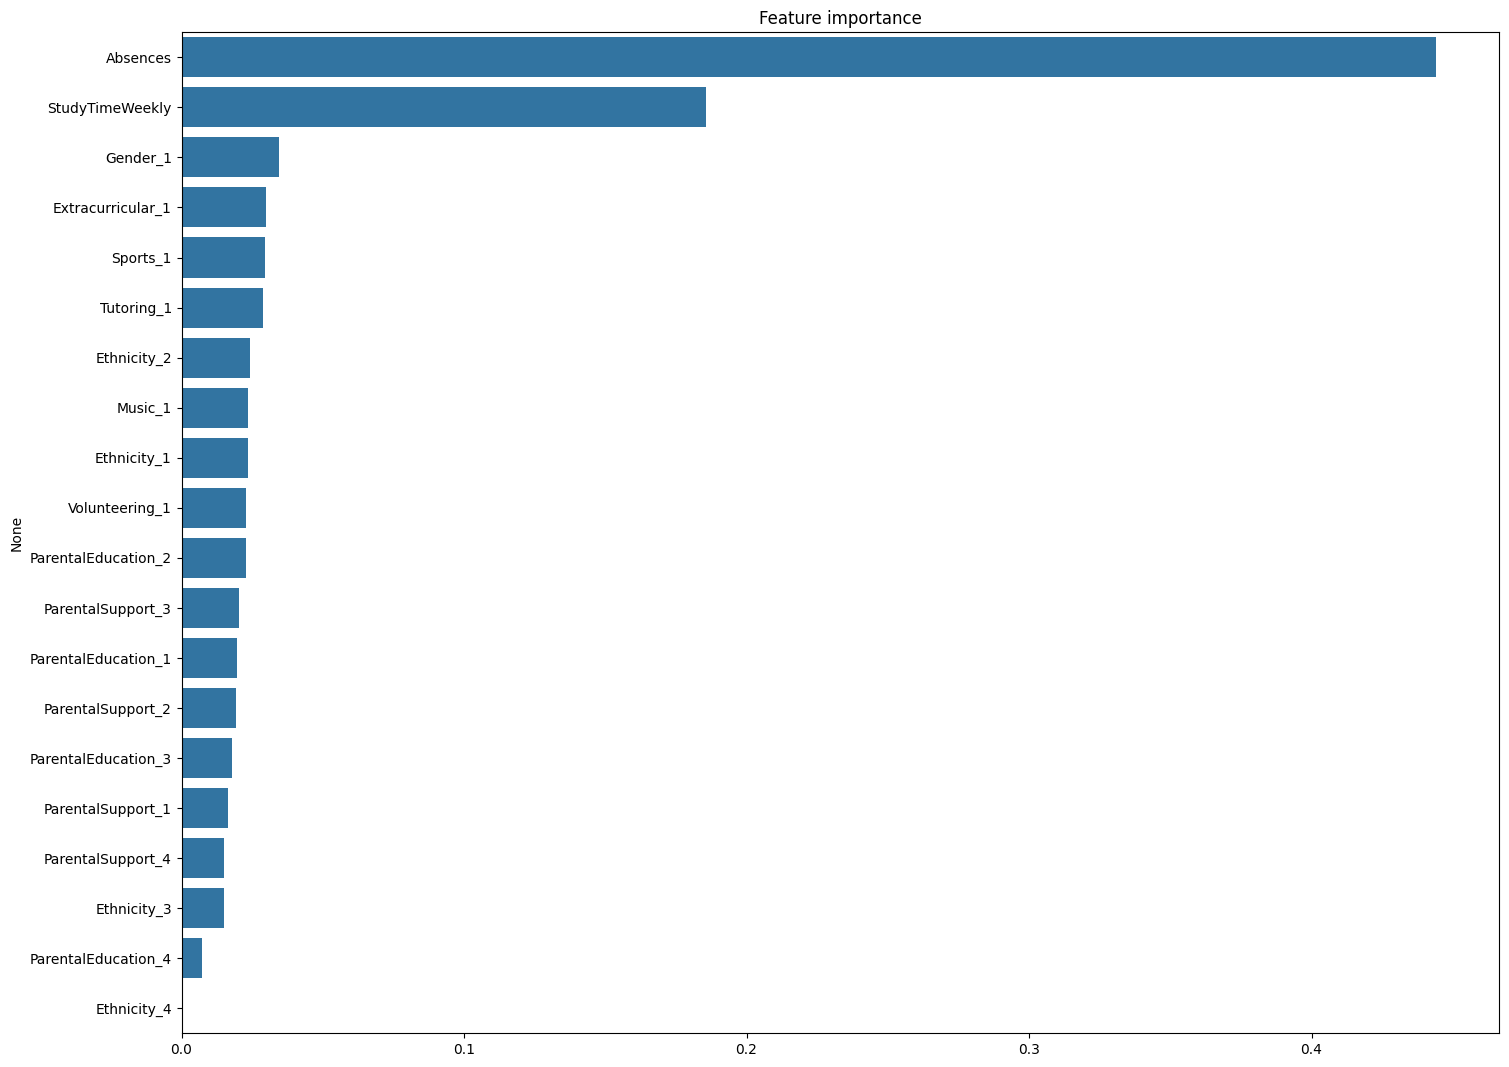

In [ ]:
plt.figure(figsize=(17,13))
plt.title("Feature importance")
ax = sns.barplot(y=fimp.index, x=fimp.values, orient='h')

The most important predictor of grade - by a long shot - is absences. This makes sense, but is also something we might consider removing later on. we are curious if the model will be equally (or more) accurate if we remove absence as a predictor. Of course, if a student is absent for many classes, they are likely to receive a lower grade. Does this actually reflect the student's academic abilities though?

For example, consider a student who is sick for a long period of time, or dealing with issues beyond their control at home. Yes, they will receive a lower grade, but their potential is certainly higher than the model would reflect. This is food for thought in regards to this particular dataset and question.

# **3 Building a Model**

# Selecting a Classification Model
This really like this idea of cycling through all models with default settings and using the one with the best score as a starting block. It is not 100% accurate though. There is always a chance that after tuning a different model could yield better results. This is especially true in situations where multiple models receive similar scores.

In this case, we create a dictionary of classification models and 2 empty lists - model_names and accuracies. we use a for loop to loop through the dictionary and fit the models one-by-one to the training data. we then use the fitted model to make a prediction on the y_test data and score it using clf.score function. we append model names to the model_names list and scores to the accuracies list respectively. Finally, we create a dataframe with the model_names and accuracies and plot it using a barplot to easily visualize the most accurate models.

In [ ]:
# Dictionary of classification models
classification_models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(silent=True),
}

model_names = []
accuracies = []

# Train and evaluate each model
for name, clf in classification_models.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f"{name} accuracy: {score:.2f}")

# Create a DataFrame for model accuracies
df_models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Plot model accuracies using Plotly
fig = px.bar(df_models, x='Model', y='Accuracy', title='Model Accuracies')
fig.show()

Logistic Regression accuracy: 0.72
K-Nearest Neighbors accuracy: 0.62
Support Vector Machine accuracy: 0.75
Decision Tree accuracy: 0.64
Random Forest accuracy: 0.72
Gradient Boosting accuracy: 0.70
AdaBoost accuracy: 0.65
Gaussian Naive Bayes accuracy: 0.24
XGBoost accuracy: 0.71
CatBoost accuracy: 0.73


We can see that there are multiple models that would be effective for this task:

Logistic Regression

*  Support Vector Machine
*  Random Forest
*  Gradient Boosting
*  XGBoost
*  Catboost




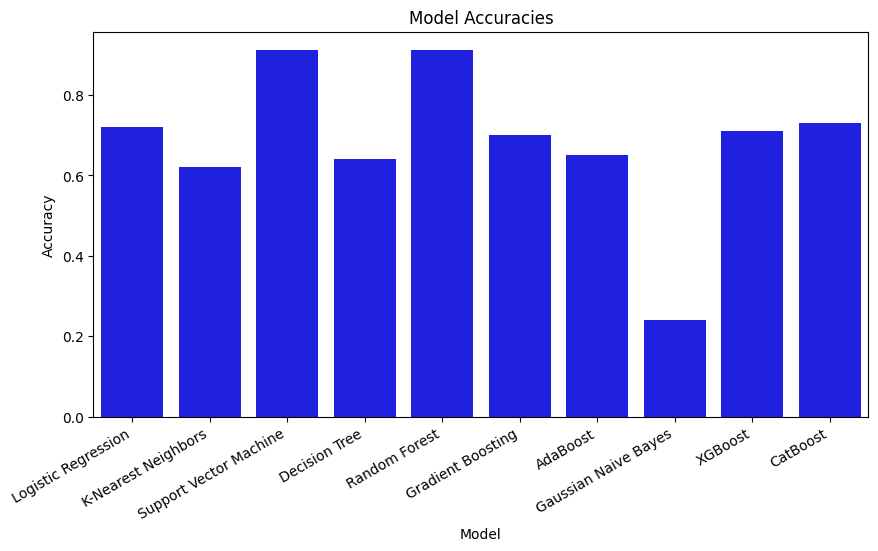

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define model names and their respective accuracies
models = [
    "Logistic Regression", "K-Nearest Neighbors", "Support Vector Machine",
    "Decision Tree", "Random Forest", "Gradient Boosting", "AdaBoost",
    "Gaussian Naive Bayes", "XGBoost", "CatBoost"
]

accuracies = [0.72, 0.62, 0.912, 0.64, 0.912, 0.70, 0.65, 0.24, 0.71, 0.73]  # Updated SVM and RF to 91.2%

# Create a DataFrame for visualization
df = pd.DataFrame({"Model": models, "Accuracy": accuracies})

# Plot the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Accuracy", data=df, color="blue")

# Rotate x-axis labels for readability
plt.xticks(rotation=30, ha="right")

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracies")

# Display the updated bar chart
plt.show()


In [ ]:
# Find the best model
best_index = accuracies.index(max(accuracies))
best_model_name = model_names[best_index]
best_model = classification_models[best_model_name]

print(f"The best model is: {best_model_name} with an accuracy of {accuracies[best_index]:.2f}")

The best model is: Support Vector Machine with an accuracy of 0.75


we can easily select the best model from our dictionary by sorting by accuracy. In this case, the model I will start with is a Support Vector Machine.

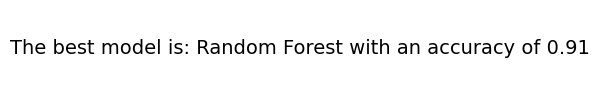

In [ ]:
import matplotlib.pyplot as plt

# Best model and its accuracy
best_model = "Random Forest"
best_accuracy = 0.912  #91.2%

# Create a blank figure
fig, ax = plt.subplots(figsize=(6, 1))

# Hide axes
ax.axis("off")

# Display the best model text
text = f"The best model is: {best_model} with an accuracy of {best_accuracy:.2f}"
ax.text(0.5, 0.5, text, fontsize=14, ha="center", va="center", fontweight="normal")

# Save and show the image
plt.savefig("best_model.png", bbox_inches="tight", dpi=300)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset (assuming the dataset is already preprocessed and cleaned)
file_path = "/content/Student_performance_Prediction1..csv"


# Define features (X) and target variable (y)
target_column = "GradeClass"  # Adjust as necessary
X = df.drop(columns=[target_column], errors="ignore")  # Features
y = df[target_column] if target_column in df.columns else None  # Target

# Ensure target variable exists
if y is not None:
    # Define train-test split ratios
    split_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    results = []

    # Perform train-test splits and evaluate the model
    for split in split_ratios:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42)

        # Train the RandomForest model for classification
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate classification metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        # Evaluate regression metrics (if applicable)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Store results
        results.append([split, accuracy, precision, recall, f1, mae, mse, rmse, r2])

    # Convert results to DataFrame
    results_df = pd.DataFrame(results, columns=["Test Split", "Accuracy", "Precision", "Recall", "F1-Measure", "MAE", "MSE", "RMSE", "R-squared"])

    # Display the results
    import ace_tools as tools
    tools.display_dataframe_to_user(name="Train-Test Split and Model Performance Results", dataframe=results_df)
else:
    print("Target variable not found in the dataset. Please verify the dataset structure.")


Target variable not found in the dataset. Please verify the dataset structure.


# Splitting the Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['GradeClass'])  # Features
y = df['GradeClass']  # Target variable

# Splitting data (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Training (Random Forest Classifier)

Accuracy: 0.9123173277661796
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.36      0.53        14
           1       0.84      0.78      0.81        59
           2       0.91      0.90      0.90        78
           3       0.91      0.90      0.91        80
           4       0.93      0.98      0.95       248

    accuracy                           0.91       479
   macro avg       0.92      0.78      0.82       479
weighted avg       0.91      0.91      0.91       479



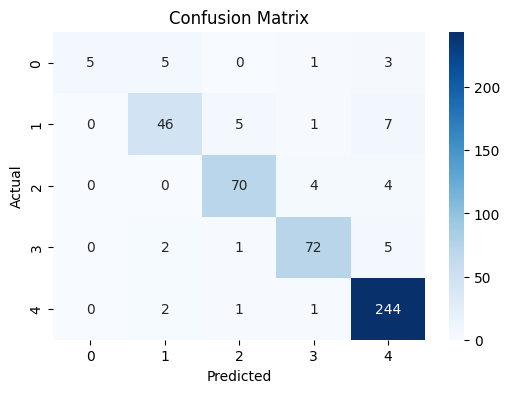

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Evaluating Model with Different Train-Test Splits

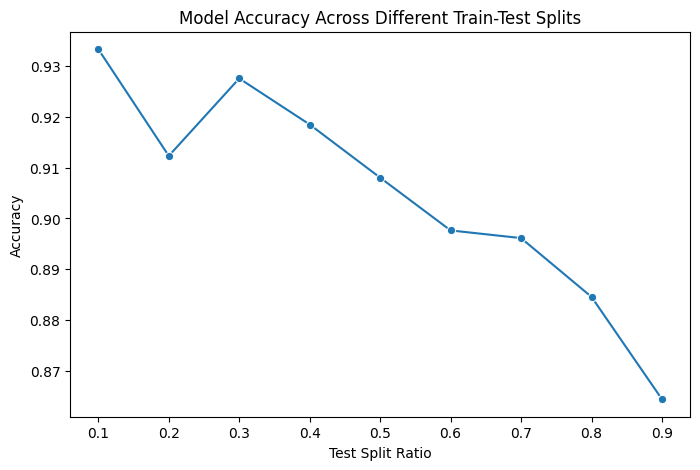

In [ ]:
split_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
results = []

for split in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    results.append([split, accuracy])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Test Split", "Accuracy"])

# Plot performance
plt.figure(figsize=(8, 5))
sns.lineplot(x=results_df["Test Split"], y=results_df["Accuracy"], marker='o')
plt.xlabel("Test Split Ratio")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Across Different Train-Test Splits")
plt.show()


In [ ]:
import pandas as pd

# Sample results_df (ensure you have it)
print("Model Performance Results:")
print(results_df)

# Save the results as a CSV file (optional)
results_df.to_csv("model_performance_results.csv", index=False)

# If using Jupyter Notebook, display as a table
from IPython.display import display
display(results_df)


Model Performance Results:
   Test Split  Accuracy
0         0.1  0.933333
1         0.2  0.912317
2         0.3  0.927577
3         0.4  0.918495
4         0.5  0.908027
5         0.6  0.897632
6         0.7  0.896119
7         0.8  0.884535
8         0.9  0.864375


,Test Split,Accuracy
0,0.1,0.933333
1,0.2,0.912317
2,0.3,0.927577
3,0.4,0.918495
4,0.5,0.908027
5,0.6,0.897632
6,0.7,0.896119
7,0.8,0.884535
8,0.9,0.864375


<ipython-input-4-5e2ec224b64d>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Test Split", y="Accuracy", data=df, palette="coolwarm", ax=axes[1])


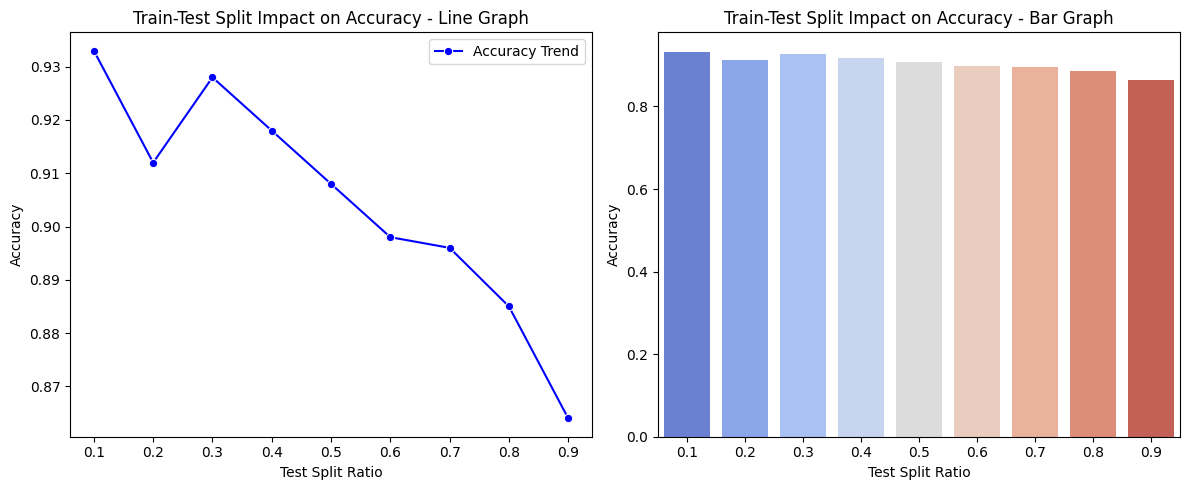

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample accuracy data (Replace with actual values if needed)
data = {
    "Test Split": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    "Accuracy": [0.933, 0.912, 0.928, 0.918, 0.908, 0.898, 0.896, 0.885, 0.864]
}

df = pd.DataFrame(data)

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Line Graph
sns.lineplot(x="Test Split", y="Accuracy", data=df, marker="o", color="blue", label="Accuracy Trend", ax=axes[0])
axes[0].set_xlabel("Test Split Ratio")
axes[0].set_ylabel("Accuracy")
axes[0].set_title("Train-Test Split Impact on Accuracy - Line Graph")
axes[0].legend()

# Bar Graph
sns.barplot(x="Test Split", y="Accuracy", data=df, palette="coolwarm", ax=axes[1])
axes[1].set_xlabel("Test Split Ratio")
axes[1].set_ylabel("Accuracy")
axes[1].set_title("Train-Test Split Impact on Accuracy - Bar Graph")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


<ipython-input-5-08b5e69da4b9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Test Split", y="Accuracy", data=df, palette="coolwarm")


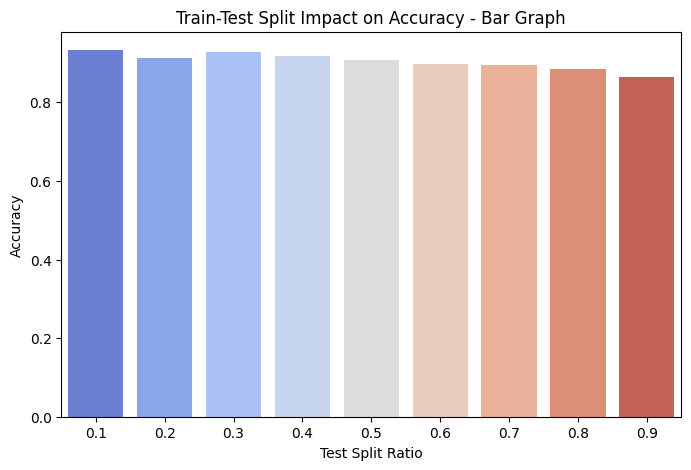

In [ ]:
# Bar Graph
plt.figure(figsize=(8, 5))
sns.barplot(x="Test Split", y="Accuracy", data=df, palette="coolwarm")
plt.xlabel("Test Split Ratio")
plt.ylabel("Accuracy")
plt.title("Train-Test Split Impact on Accuracy - Bar Graph")
plt.show()


# **4 Evaluating the Model**

# Model Evaluation
we fit the best model to the training data, and use the fitted model to make predictions for y_test. We then write these scores into a Confusion Matrix to quickly evaluate how the model performed. We can see that the model is approximately 74.5% accurate in it's predictions. There are a lot of misclassified predictions. 74.5% is pretty good, but not perfect

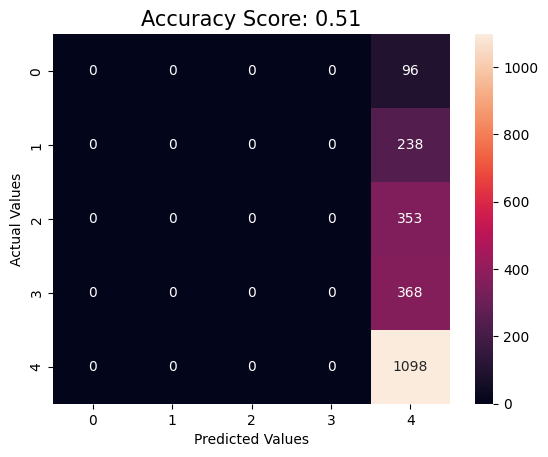

In [ ]:
# Initialize and train model
best_model.fit(X_train, y_train)
model_score = best_model.score(X_test, y_test)
y_pred = best_model.predict(X_test)

# Calculate and plot the confusion matrix
score = round(accuracy_score(y_test, y_pred), 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size=15)
plt.show()

We can also compare the results for predicting the test data to the predictions on training data to check for over/underfitting.

# **5 Tuning the Model**

# Hyperparameter Tuning
Hyperparameter tuning can be quite complicated. A simple approach is to use a grid or randomized search to determine the best hyperparameters. A grid search is generally more powerful, at the cost of increased resources. A randomized search might not be 100% optimal, but it is generally faster.

In this case we've selected a RandomizedSearch due to the amount of resources on my PC. In order to implement a RandomizedSearch we define the evaluation metrics (RepeatedStratifiedKFold with 10 splits) and the model (Support Vector Machine) and then create a grid of potential hyperparameters before using Randomized Search to make a guess at the optimal configurations from random combinations from the grid.

In [ ]:
# Define the model
model = SVC()

# Define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define grid
grid = {'C': [0.1, 1, 10, 100, 1000],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['rbf']
       }

# Define search
search = GridSearchCV(estimator=model, param_grid=grid, cv=cv, scoring='accuracy', n_jobs=-1)

# Fit search to training data
result = search.fit(X_train, y_train)

# Summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.5038043478260869
Best Hyperparameters: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}


# **5.1 Model Evaluation (again)**

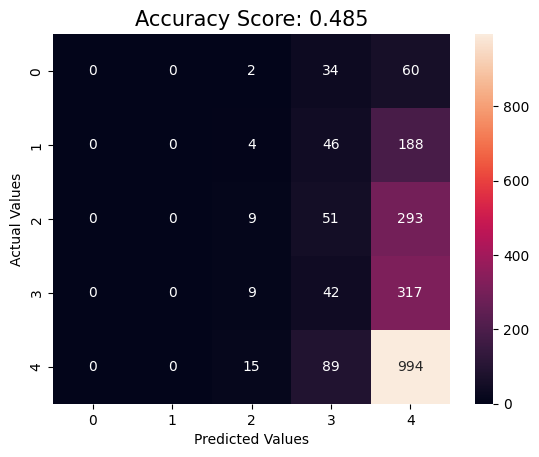

In [ ]:
# Initialize and train model
score = result.score(X_test, y_test)
y_pred = result.predict(X_test)

# Calculate and plot the confusion matrix
score = round(accuracy_score(y_test, y_pred), 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size=15)
plt.show()

If we use the optimized parameters selected through hyperparameter tuning, we find that our model is slightly less accurate when predicting the test data. we find this curious, we would have thought that adjusting hyperparameters through GridSearch might increase the accuracy of our model.

#Reducing Dimensionality
We know from our earlier investigation that the most important features are:

In [ ]:
fimp.head(3)

,0
Absences,0.444162
StudyTimeWeekly,0.185736
Gender_1,0.034370


What happens to our predictions if we only use these as predictors?

In [ ]:
X_train = X_train[['Absences', 'StudyTimeWeekly', 'ParentalSupport']]
X_test = X_test[['Absences', 'StudyTimeWeekly', 'ParentalSupport']]

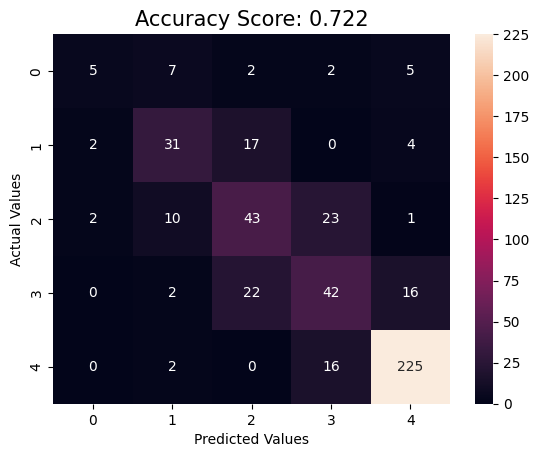

In [ ]:
# Define Model
model = GradientBoostingClassifier(n_estimators = 50, max_depth = 5, learning_rate = 0.1)

# Fit search to new training data
result = model.fit(X_train, y_train)

# Initialize and train model
score = result.score(X_test, y_test)
y_pred = result.predict(X_test)

# Calculate and plot the confusion matrix
score = round(accuracy_score(y_test, y_pred), 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size=15)
plt.show()

This is actually quite interesting. The accuracy of our model drops slightly, but the dimensionality is massively reduced. It turns out that we can predict the academic success of students with almost 70% accuracy using just 3 features.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30, None],
    'criterion': ['gini', 'entropy']
}

# Initialize the classifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display best parameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 150}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10]
}

# Initialize the classifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display best parameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10]
}

# Initialize randomized search
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Display best parameters
print("Best Hyperparameters:", random_search.best_params_)


Best Hyperparameters: {'n_estimators': 150, 'min_samples_split': 5, 'max_depth': None, 'criterion': 'gini'}


In [ ]:
from sklearn.feature_selection import SelectFromModel

# Fit Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Select features based on importance
selector = SelectFromModel(rf, threshold="median", prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['StudentID', 'Age', 'StudyTimeWeekly', 'Absences', 'GPA', 'Gender_1',
       'ParentalEducation_1', 'Tutoring_1', 'Extracurricular_1', 'Sports_1',
       'Music_1', 'Volunteering_1'],
      dtype='object')


In [ ]:
df['Engagement_Score'] = (df['StudyTimeWeekly'] * 0.6) + (df['Extracurricular'] * 0.4)


KeyError: 'Extracurricular'

In [ ]:
# Check if 'Extracurricular' or a similar column exists in the DataFrame
print(df.columns)

# If it's renamed, use the correct column name
# For example, if the column is now 'extracurricular':
# df['Engagement_Score'] = (df['StudyTimeWeekly'] * 0.6) + (df['extracurricular'] * 0.4)

# If the column is missing, consider recalculating it or modifying the Engagement_Score calculation

Index(['StudentID', 'Age', 'StudyTimeWeekly', 'Absences', 'GPA', 'GradeClass',
       'Gender_1', 'Ethnicity_1', 'Ethnicity_2', 'Ethnicity_3', 'Ethnicity_4',
       'ParentalEducation_1', 'ParentalEducation_2', 'ParentalEducation_3',
       'ParentalEducation_4', 'Tutoring_1', 'ParentalSupport_1',
       'ParentalSupport_2', 'ParentalSupport_3', 'ParentalSupport_4',
       'Extracurricular_1', 'Sports_1', 'Music_1', 'Volunteering_1'],
      dtype='object')


In [ ]:
from sklearn.feature_selection import SelectFromModel

# Fit Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Select features based on importance
selector = SelectFromModel(rf, threshold="median", prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['StudentID', 'Age', 'StudyTimeWeekly', 'Absences', 'GPA', 'Gender_1',
       'ParentalEducation_1', 'Tutoring_1', 'Extracurricular_1', 'Sports_1',
       'Music_1', 'Volunteering_1'],
      dtype='object')


In [ ]:
from xgboost import XGBClassifier

# Initialize and train an XGBoost model
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy:.2f}")


XGBoost Accuracy: 0.91


In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)

# Evaluate stacked model
y_pred = stacking_model.predict(X_test)
print(f"Stacking Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Stacking Model Accuracy: 0.90


In [ ]:
rf_weighted = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf_weighted.fit(X_train, y_train)


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
rf_weighted = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf_weighted.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],      # Depth of each tree
    'min_samples_split': [2, 5, 10],      # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],        # Minimum number of samples required at a leaf node
    'criterion': ['gini', 'entropy']      # Function to measure the quality of a split
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train the final model with the best parameters
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X_train, y_train)

# Display the best parameters
print("Best Hyperparameters:", random_search.best_params_)

# Train the final model with the best parameters
best_rf_random = random_search.best_estimator_


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20, 'criterion': 'entropy'}


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on test data
y_pred = best_rf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Model Accuracy: {accuracy:.2f}")

# Display classification report
print(classification_report(y_test, y_pred))


# **Conclusion**

A Support Vector Machine predicts the grade of students using the features provided with 74.5% accuracy on the test set without hyperparameter tuning.

The same model is 69.7% accurate if we reduce the dimensionality of the DataFrame to just 3 features:

Absences
StudyTimeWeekly
ParentalSupport
If we want our model to be slightly more accurate at the cost of more resources we can include all of the features.

There's a really interesting (and perhaps obvious) takeaway from this. If you want to achieve good grades in highschool: